In [1]:
# import

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

In [3]:
# csv to pd frame 

csv_path = 'D:/INFORMATIKA 2020/Semester 7/Analisis Big Data/anonymisedData/'
data_dicts = {csv_name[:-4]: pd.read_csv(csv_path+csv_name) for csv_name in os.listdir(csv_path)}

courses.csv

In [4]:
data_dicts['courses'].groupby(['code_module','code_presentation']).agg(['min','max'])

module_presentation_length     
                                                     min  max
code_module code_presentation                                
AAA         2013J                                    268  268
            2014J                                    269  269
BBB         2013B                                    240  240
            2013J                                    268  268
            2014B                                    234  234
            2014J                                    262  262
CCC         2014B                                    241  241
            2014J                                    269  269
DDD         2013B                                    240  240
            2013J                                    261  261
            2014B                                    241  241
            2014J                                    262  262
EEE         2013J                                    268  268
            2014B                                    241  241
            2014J                                    269  269
FFF         2013B                                    240  240
            2013J                                    268  268
            2014B                                    241  241
            2014J                                    269  269
GGG         2013J                                    261  261
            2014B                                    241  241
            2014J                                    269  269

Berdasarkan dokumentasi data, tercatat ada 8 mata kuliah (modul), dari A sampai G (AAA dalam dataset, selanjutnya disingkat menjadi A). Tercatat ada 2 semester, Februari (B) dan Oktober (J). Semester di bulan Februari biasanya 20 hari lebih pendek dari semester di bulan Oktober. Beberapa kursus (C,E,G) tidak memiliki data untuk tahun 2013 dan 2014.

assessments.csv

In [5]:
df = data_dicts['assessments']
df.drop(['date','weight'],axis = 1).groupby(['code_module','assessment_type','code_presentation']).count()

id_assessment
code_module assessment_type code_presentation               
AAA         Exam            2013J                          1
                            2014J                          1
            TMA             2013J                          5
                            2014J                          5
BBB         CMA             2013B                          5
                            2013J                          5
                            2014B                          5
            Exam            2013B                          1
                            2013J                          1
                            2014B                          1
                            2014J                          1
            TMA             2013B                          6
                            2013J                          6
                            2014B                          6
                            2014J                          5
CCC         CMA             2014B                          4
                            2014J                          4
            Exam            2014B                          2
                            2014J                          2
            TMA             2014B                          4
                            2014J                          4
DDD         CMA             2013B                          7
            Exam            2013B                          1
                            2013J                          1
                            2014B                          1
                            2014J                          1
            TMA             2013B                          6
                            2013J                          6
                            2014B                          6
                            2014J                          6
EEE         Exam            2013J                          1
                            2014B                          1
                            2014J                          1
            TMA             2013J                          4
                            2014B                          4
                            2014J                          4
FFF         CMA             2013B                          7
                            2013J                          7
                            2014B                          7
                            2014J                          7
            Exam            2013B                          1
                            2013J                          1
                            2014B                          1
                            2014J                          1
            TMA             2013B                          5
                            2013J                          5
                            2014B                          5
                            2014J                          5
GGG         CMA             2013J                          6
                            2014B                          6
                            2014J                          6
            Exam            2013J                          1
                            2014B                          1
                            2014J                          1
            TMA             2013J                          3
                            2014B                          3
                            2014J                          3

Kursus C memiliki 2 ujian akhir. Kursus A tidak memiliki Computer Marked Assessment (CMA). Setiap kursus memiliki setidaknya 3 TMA.

In [6]:
df.drop(['id_assessment'],axis = 1).groupby(['code_module','assessment_type','code_presentation']).agg(['min','max'])

date        weight       
                                                 min    max    min    max
code_module assessment_type code_presentation                            
AAA         Exam            2013J                NaN    NaN  100.0  100.0
                            2014J                NaN    NaN  100.0  100.0
            TMA             2013J               19.0  215.0   10.0   30.0
                            2014J               19.0  215.0   10.0   30.0
BBB         CMA             2013B               54.0  187.0    1.0    1.0
                            2013J               54.0  208.0    1.0    1.0
                            2014B               47.0  194.0    1.0    1.0
            Exam            2013B                NaN    NaN  100.0  100.0
                            2013J                NaN    NaN  100.0  100.0
                            2014B                NaN    NaN  100.0  100.0
                            2014J                NaN    NaN  100.0  100.0
            TMA             2013B               19.0  187.0    5.0   18.0
                            2013J               19.0  208.0    5.0   18.0
                            2014B               12.0  194.0    5.0   18.0
                            2014J               19.0  201.0    0.0   35.0
CCC         CMA             2014B               18.0  207.0    2.0    8.0
                            2014J               18.0  214.0    2.0    8.0
            Exam            2014B                NaN    NaN  100.0  100.0
                            2014J                NaN    NaN  100.0  100.0
            TMA             2014B               32.0  200.0    9.0   22.0
                            2014J               32.0  207.0    9.0   22.0
DDD         CMA             2013B               23.0  206.0    2.0    6.0
            Exam            2013B              240.0  240.0  100.0  100.0
                            2013J              261.0  261.0  100.0  100.0
                            2014B              241.0  241.0  100.0  100.0
                            2014J                NaN    NaN  100.0  100.0
            TMA             2013B               25.0  200.0    7.5   15.0
                            2013J               25.0  207.0   10.0   20.0
                            2014B               25.0  200.0   10.0   20.0
                            2014J               20.0  195.0    5.0   25.0
EEE         Exam            2013J              235.0  235.0  100.0  100.0
                            2014B              228.0  228.0  100.0  100.0
                            2014J              235.0  235.0  100.0  100.0
            TMA             2013J               33.0  159.0   16.0   28.0
                            2014B               33.0  152.0   16.0   28.0
                            2014J               33.0  166.0   16.0   28.0
FFF         CMA             2013B              222.0  222.0    0.0    0.0
                            2013J              236.0  236.0    0.0    0.0
                            2014B              227.0  227.0    0.0    0.0
                            2014J              241.0  241.0    0.0    0.0
            Exam            2013B              222.0  222.0  100.0  100.0
                            2013J              236.0  236.0  100.0  100.0
                            2014B              227.0  227.0  100.0  100.0
                            2014J              241.0  241.0  100.0  100.0
            TMA             2013B               19.0  166.0   12.5   25.0
                            2013J               19.0  173.0   12.5   25.0
                            2014B               24.0  171.0   12.5   25.0
                            2014J               24.0  199.0   12.5   25.0
GGG         CMA             2013J              229.0  229.0    0.0    0.0
                            2014B              222.0  222.0    0.0    0.0
                            2014J              229.0  229.0    0.0    0.0
            Exam            2013J              229.0

Menurut dokumentasi data, ujian memiliki bobot 100, dan semua tugas lainnya memiliki bobot yang berjumlah 100. Namun, hal ini tidak berlaku untuk semua mata pelajaran. Di mata kuliah G, hanya ujian yang berbobot. Selain itu, kursus G memiliki semua CMA pada tanggal yang sama. Mata kuliah G juga tidak normal dalam hal tanggal penugasan: semua mata kuliah lainnya mempunyai tugas pertama dalam 30 hari pertama, namun tugas pertama untuk mata kuliah G adalah pada hari ke 61. Terakhir, tanggal ujian akhir tidak ada, namun ini dapat diambil dari kumpulan data kursus.csv.

vle.csv

In [9]:
df = data_dicts['vle']
df.head()
# sum(df['week_from'].isnull())/df.shape[0]

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


week_from dan week_to memberi tahu kami jangka waktu penggunaan konten tertentu. Sayangnya, lebih dari 82% konten ini hilang dari kumpulan data.

studentInfo.csv

In [11]:
df = data_dicts['studentInfo']
df.head()
# df['imd_band'].isnull().sum()
# columns = df.columns[3:]
# for column in columns:
#     print(df[column].value_counts(),'\n')

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [12]:
print('Number of missing entries per column:')
df.isnull().sum()

Number of missing entries per column:


code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

Ada 1000 pengamatan dengan imd_band (Indeks Kerusakan Berganda, indeks kondisi kehidupan) hilang. Sesuatu yang mungkin ingin kami pertimbangkan saat membuat model nanti.

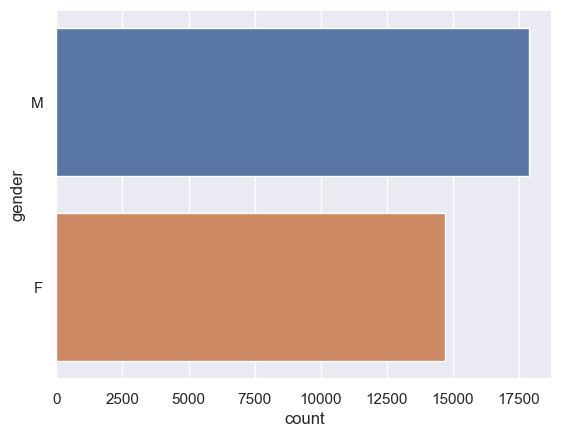

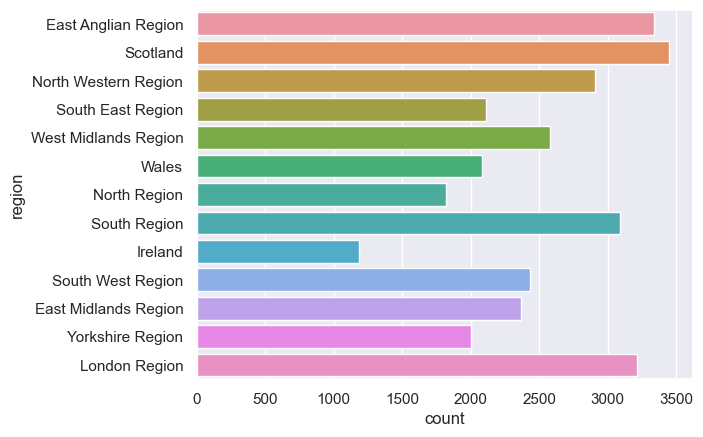

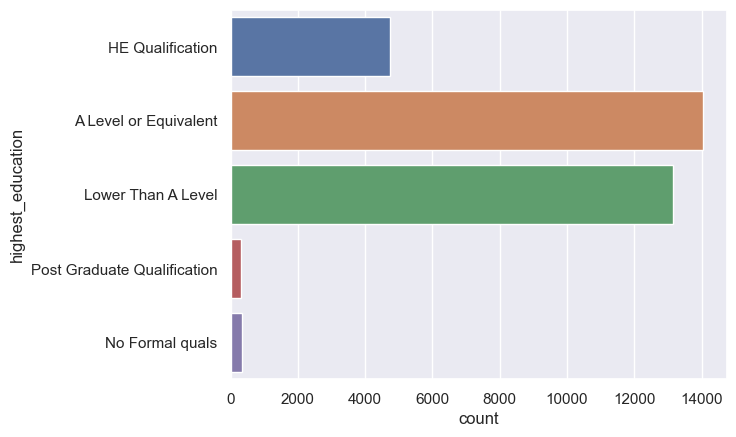

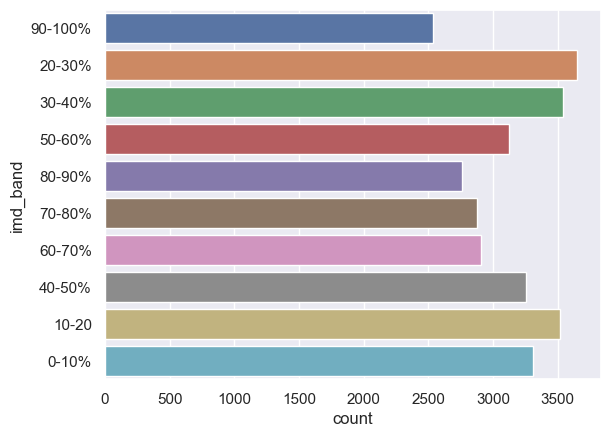

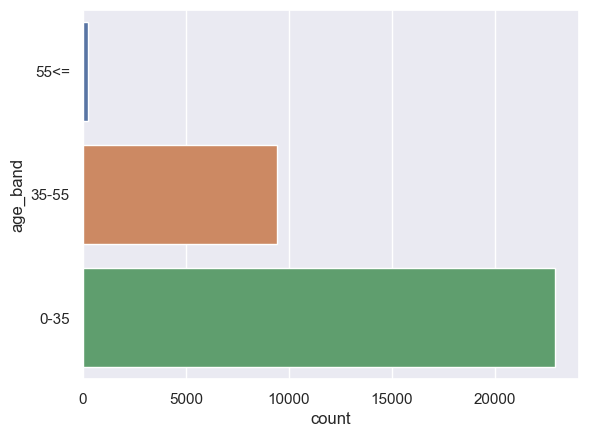

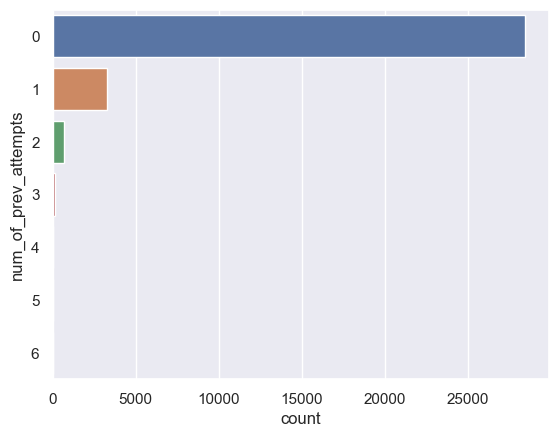

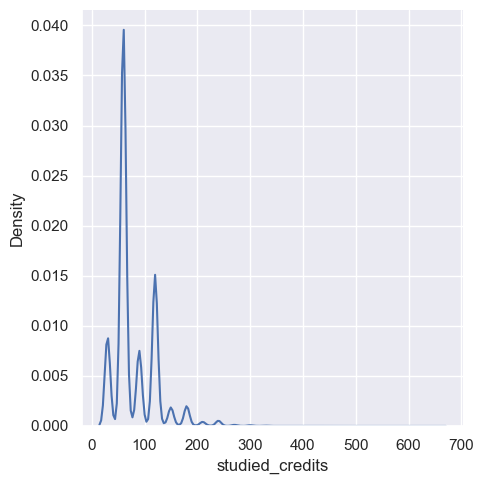

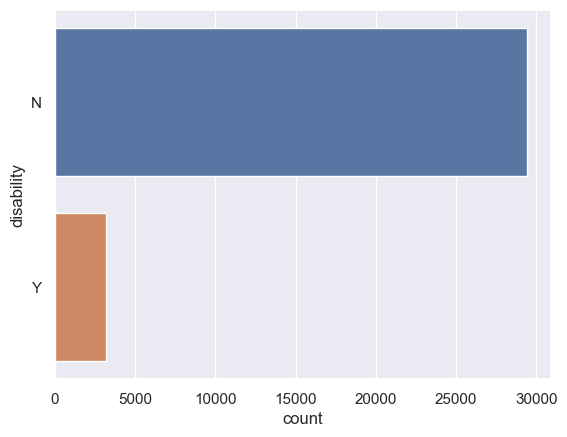

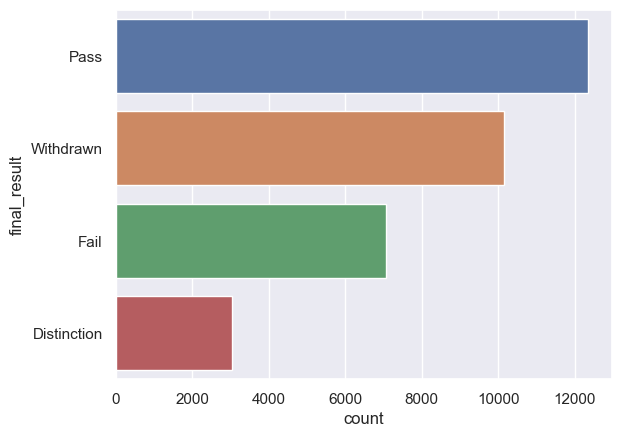

In [13]:
sns.set_theme(style="darkgrid")
for i, column in enumerate(df.columns):
    if i>2 and i != 9:
        sns.countplot(y = column, data = df)
        plt.show()
    elif i == 9: 
        sns.displot(x = column, data = df, kind="kde")
        plt.show()

Fitur tertentu seperti study_credits, num_of_prev_attempts, age_band, high_education berisi beberapa observasi ekstrem. Ini sebenarnya bukan masalah untuk analisis kami, karena kami akan menggunakan Random Forest

studentRegistration.csv

In [14]:
df = data_dicts['studentRegistration']
df.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


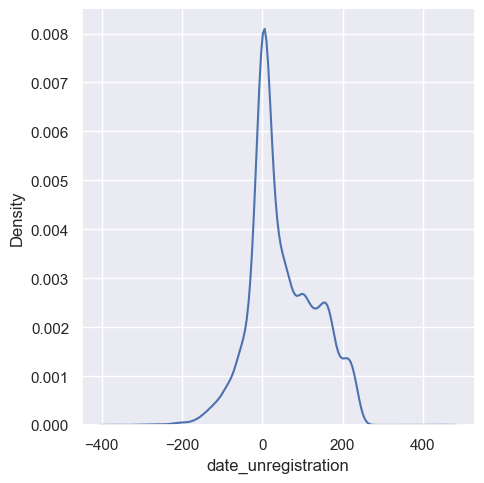

In [15]:
sns.displot(x = 'date_unregistration', data = df, kind="kde")
plt.show()

Dari alur ceritanya, kita dapat melihat bahwa ada cukup banyak siswa yang mengundurkan diri dari suatu kursus sebelum kursus dimulai. Kami akan menghapus siswa ini dari kumpulan data kami nanti, karena kami tidak memiliki data prestasi akademik mereka.

studentAssessment.csv

In [16]:
df = data_dicts['studentAssessment']
df.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [17]:
print('Number of missing entries per column:')
df.isnull().sum()

Number of missing entries per column:


id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

Berdasarkan dokumentasi data, skor berkisar antara 0 hingga 100. Skor yang lebih rendah dari 40 diartikan sebagai Gagal. Jika siswa tidak menyerahkan penilaian, tidak ada hasil yang dicatat. Sebagian besar nilai yang hilang berasal dari ujian akhir, sehingga tidak mempengaruhi analisis kami, karena kami hanya memperhatikan kinerja siswa di awal semester.

## Prepping the Data for Analysis

In [18]:
# function for merging 2 pandas dataframes

def inner_merge(left_df,right_df,right_cols,on_cols):
    right_df = right_df[right_cols]
    left_df = left_df.merge(right_df, on = on_cols)
    return left_df.drop_duplicates()

Kami ingin memprediksi hasil akhir siswa berdasarkan kinerja awal mereka. Yang kami maksud dengan kinerja adalah 2 hal: kinerja akademik, diukur melalui skor siswa, dan keterlibatan akademik, diukur melalui berapa kali siswa mengklik konten kursus. Tiga variabel di bawah mengontrol berapa hari dalam satu semester yang ingin kita sertakan untuk analisis.

In [19]:
score_deadline = 90
click_deadline = 90
withdraw_deadline = 90

Di bawah ini kami memiliki fungsi yang membuat kumpulan data yang berisi skor tugas rata-rata setiap siswa dalam hari batas waktu_skor pertama. Fungsi lainnya untuk membuat kumpulan data yang berisi jumlah rata-rata klik setiap siswa untuk setiap kategori sumber daya dalam hari batas waktu_klik pertama. Kemudian berfungsi untuk menggabungkan kedua dataset tersebut, serta menghapus siswa yang mengundurkan diri sebelum batas waktu penarikan. Karena analisis kami hanya berkaitan dengan Lulus/Gagal, kami menggabungkan hasil akhir Distinction menjadi Lulus, dan menggabungkan Ditarik menjadi Gagal. Idenya adalah bahwa setelah jangka waktu tertentu, satu-satunya orang yang mengundurkan diri adalah orang-orang yang peduli dengan kinerja mereka, dan kecil kemungkinannya untuk mengundurkan diri karena alasan non-akademik.

In [20]:
# score data

def create_score_df(score_deadline):

    df1 = data_dicts['assessments']
    df2 = data_dicts['studentAssessment']

    score_df = inner_merge(df1,
                           df2,
                           df2.columns,
                           ['id_assessment'],
                          )

    score_df = score_df[score_df['date'] < score_deadline]

    score_df = score_df[score_df['assessment_type'] != 'Exam']

    score_df = score_df.dropna(subset = ['score']) 

    score_df.isnull().sum()

    score_df['assessment_type'].value_counts()

    score_df = score_df.groupby(['code_module', 'code_presentation', 'id_student']).mean().reset_index()
    score_df = score_df.rename(columns = {'score': f'mean_score_day{score_deadline}'})
    score_df = score_df.drop(['date', 'weight', 
                              'date_submitted', 'is_banked',
                              'id_assessment'],
                             axis = 1)
    return score_df

In [21]:
# click data

def create_click_df(click_deadline):

    clicks = data_dicts['studentVle']

    clicks = inner_merge(clicks,
                         data_dicts['vle'],
                         ['id_site','code_module','code_presentation','activity_type'],
                         ['id_site','code_module','code_presentation'],
                        )

    clicks = clicks.drop('id_site', axis = 1)

    def clicks_xx(clicks,xx):
        temp = clicks[clicks['date'] <= xx]
        temp = temp.drop('date', axis = 1)
        temp = temp.groupby(['code_module','code_presentation','id_student','activity_type']).mean()
        temp = temp.rename(columns = {'sum_click': f'sum_click{xx} mean'})
        temp = temp.reset_index() # this fills out the missing columns for merging later 
        return temp

    click_data = pd.pivot_table(data = clicks_xx(clicks,click_deadline), 
                                index = ['code_module','code_presentation','id_student'],
                                columns = 'activity_type', 
                                values = [f'sum_click{click_deadline} mean'],
                                fill_value = 0,
                               ).reset_index()

    # get rid of multi index
    click_data = pd.concat([click_data['code_module'],
                            click_data['code_presentation'],
                            click_data['id_student'], 
                            click_data[f'sum_click{click_deadline} mean']], axis=1)
    return click_data

In [22]:
# merge score_df and click_df
def create_final_df(withdraw_deadline, score_df, click_df):

    final_df = inner_merge(click_df, # merge with StudentInfo
                           data_dicts['studentInfo'],
                           data_dicts['studentInfo'].columns,
                           ['code_module', 'code_presentation', 'id_student'],
                          )

    final_df = final_df.replace('Distinction','Pass') # merge Pass and Distinction

    final_df = inner_merge(final_df, 
                           data_dicts['studentRegistration'],
                           ['code_module', 'code_presentation', 'id_student', 'date_unregistration'],
                           ['code_module', 'code_presentation', 'id_student'],
                          )

    final_df = final_df[(final_df['final_result'] != 'Withdrawn') | # remove people who withdrew before withdraw_deadline
                       (final_df['date_unregistration'] > withdraw_deadline)]

    final_df = final_df.reset_index()

    final_df = final_df.drop(['date_unregistration','index'],axis = 1)

    final_df = inner_merge(final_df,
                           score_df,
                           score_df.columns,
                           ['code_module', 'code_presentation', 'id_student'])
    
    final_df = final_df.replace('Withdrawn','Fail') # merge Withdrawn to Fail

    return final_df

In [24]:
score_df = create_score_df(score_deadline)
click_df = create_click_df(click_deadline)
final_df = create_final_df(withdraw_deadline, score_df, click_df)
final_df.head()

C:\Users\haidar\AppData\Local\Temp\ipykernel_1944\3368013317.py:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  score_df = score_df.groupby(['code_module', 'code_presentation', 'id_student']).mean().reset_index()


,code_module,code_presentation,id_student,dataplus,dualpane,externalquiz,forumng,glossary,homepage,htmlactivity,...,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,mean_score_day90
0,AAA,2013J,11391,0.0,0.0,0.0,3.514286,0.0,3.478261,0.0,...,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,81.5
1,AAA,2013J,28400,0.0,0.0,0.0,2.988889,0.0,5.194444,0.0,...,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,69.0
2,AAA,2013J,31604,0.0,0.0,0.0,2.955882,1.0,4.340000,0.0,...,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,71.5
3,AAA,2013J,32885,0.0,0.0,0.0,3.127660,2.0,3.600000,0.0,...,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,49.5
4,AAA,2013J,38053,7.0,0.0,0.0,3.457364,0.0,4.438596,0.0,...,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,74.0


In [32]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23863 entries, 0 to 23862
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           23863 non-null  object 
 1   code_presentation     23863 non-null  object 
 2   id_student            23863 non-null  int64  
 3   dataplus              23863 non-null  float64
 4   dualpane              23863 non-null  float64
 5   externalquiz          23863 non-null  float64
 6   folder                23863 non-null  float64
 7   forumng               23863 non-null  float64
 8   glossary              23863 non-null  float64
 9   homepage              23863 non-null  float64
 10  htmlactivity          23863 non-null  float64
 11  oucollaborate         23863 non-null  float64
 12  oucontent             23863 non-null  float64
 13  ouelluminate          23863 non-null  float64
 14  ouwiki                23863 non-null  float64
 15  page               

In [36]:
pd.set_option('display.max_columns', None)
final_df.head()

,code_module,code_presentation,id_student,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,mean_score_day210
0,AAA,2013J,11391,0.000000,0.0,0.0,0.0,3.558140,0.000000,3.764706,0.0,0.0,9.367347,0.0,0.0,0.0,0.0,0.0,0,1.222222,0.0,3.000000,1.250000,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,82.00
1,AAA,2013J,28400,3.333333,0.0,0.0,0.0,2.649635,0.000000,4.148649,0.0,0.0,5.260870,0.0,0.0,0.0,0.0,0.0,0,1.000000,0.0,2.100000,1.777778,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,68.00
2,AAA,2013J,31604,2.000000,0.0,0.0,0.0,2.897436,1.000000,3.762376,0.0,0.0,4.627219,0.0,0.0,0.0,0.0,0.0,0,1.555556,0.0,1.721519,1.764706,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,76.25
3,AAA,2013J,32885,0.000000,0.0,0.0,0.0,3.040816,1.333333,3.087719,0.0,0.0,4.460784,0.0,0.0,0.0,0.0,0.0,0,2.111111,0.0,1.476190,1.100000,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,49.25
4,AAA,2013J,38053,7.000000,0.0,0.0,0.0,3.089202,0.000000,3.733945,0.0,0.0,4.130769,0.0,0.0,0.0,0.0,0.0,0,1.428571,0.0,1.702128,1.333333,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,68.00


In [37]:
final_df.head().T

,0,1,2,3,4
code_module,AAA,AAA,AAA,AAA,AAA
code_presentation,2013J,2013J,2013J,2013J,2013J
id_student,11391,28400,31604,32885,38053
dataplus,0.0,3.333333,2.0,0.0,7.0
dualpane,0.0,0.0,0.0,0.0,0.0
externalquiz,0.0,0.0,0.0,0.0,0.0
folder,0.0,0.0,0.0,0.0,0.0
forumng,3.55814,2.649635,2.897436,3.040816,3.089202
glossary,0.0,0.0,1.0,1.333333,0.0
homepage,3.764706,4.148649,3.762376,3.087719,3.733945


Terakhir, kami melakukan beberapa perbaikan pada kerangka data sebelum memasukkannya ke model kami. Pertama kita ingin mengkodekan semua variabel kategori. Di sini kita melakukan pengkodean label daripada pengkodean one-hot, hanya karena ini berfungsi untuk algoritma berbasis pohon, dan lebih mudah dibaca jika nanti kita ingin memeriksa setiap pohon secara visual.

In [25]:
def create_Xy(final_df):

    X = final_df.drop(['final_result','id_student','imd_band'],axis = 1)
    column_names = X.columns
    y = final_df['final_result']

    le = LabelEncoder()
    encode_dict = {}
    Xcat_features = ['code_module', 'code_presentation',
                    'gender', 'region',
                    'highest_education',  
                    'age_band','disability',
                   ]

    for cat_feature in Xcat_features: 
        X[cat_feature] = le.fit_transform(X[cat_feature])
        encode_dict[cat_feature] = le.classes_

    y = le.fit_transform(y)
    encode_dict['final_result'] = le.classes_

    X = X.to_numpy()
    
    return X,y,column_names,encode_dict

In [26]:
X,y,column_names,encode_dict = create_Xy(final_df)

Kami juga ingin menangani potensi kolinearitas dalam data. Meskipun kolinearitas tidak berdampak pada model Random Forest, hal ini mungkin berdampak negatif pada analisis kepentingan fitur yang kami lakukan setelahnya.

In [27]:
corr = spearmanr(X).correlation
corr_linkage = hierarchy.ward(corr)
cluster_ids = hierarchy.fcluster(corr_linkage, 1, criterion='distance')
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

X = X[:, selected_features]
column_names = column_names[selected_features]

## Modeling

Here we use Random Forest simply because it's a good model for classification on tabular data. It's also good out-of-the-box, i.e. not a lot of fussing over hyperparameters. Moreover, there is a straight-forward implementation for permutation feature importance

In [28]:
reg = RandomForestClassifier(n_estimators = 200,
                             max_features = 'sqrt', 
                             min_samples_split = 10, 
                            )

kf = KFold(n_splits=5, shuffle = True)

def train(X,y,reg,kf):
    if kf == False: 
        reg.fit(X,y)
    else:
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            reg.fit(X_train,y_train)
            print(f'evaluate score: {reg.score(X_test,y_test)}')

In [29]:
train(X,y,reg,kf)

evaluate score: 0.748157506843546
evaluate score: 0.7532112023583912
evaluate score: 0.7464729416719309
evaluate score: 0.7464195450716091
evaluate score: 0.7508424599831508


Skor evaluasi kami sekitar 75%. Tidak terlalu mengesankan. Mari kita coba lagi dalam beberapa hari lagi

In [30]:
days_list = [120,150,180,210]

for days in days_list:
    score_deadline = days
    click_deadline = days
    
    score_df = create_score_df(score_deadline)
    click_df = create_click_df(click_deadline)
    final_df = create_final_df(withdraw_deadline, score_df, click_df)
    
#     score_df.to_csv(f'score_df{days}.csv',index = False)
#     click_df.to_csv(f'click_df{days}.csv',index = False)
#     final_df.to_csv(f'final_df{days}.csv',index = False)
    
    X,y,column_names,encode_dict = create_Xy(final_df)
    
    print(f'Number of days in data: {days}')
    train(X,y,reg,kf)
    print('\n')

C:\Users\haidar\AppData\Local\Temp\ipykernel_1944\3368013317.py:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  score_df = score_df.groupby(['code_module', 'code_presentation', 'id_student']).mean().reset_index()


Number of days in data: 120
evaluate score: 0.7562000840689366
evaluate score: 0.7536780159730979
evaluate score: 0.7507356031946196
evaluate score: 0.7641866330390921
evaluate score: 0.7578305654824469




C:\Users\haidar\AppData\Local\Temp\ipykernel_1944\3368013317.py:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  score_df = score_df.groupby(['code_module', 'code_presentation', 'id_student']).mean().reset_index()


Number of days in data: 150
evaluate score: 0.7811779501152798
evaluate score: 0.7675539719136449
evaluate score: 0.773841961852861
evaluate score: 0.7648291762733179
evaluate score: 0.769182389937107




C:\Users\haidar\AppData\Local\Temp\ipykernel_1944\3368013317.py:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  score_df = score_df.groupby(['code_module', 'code_presentation', 'id_student']).mean().reset_index()


Number of days in data: 180
evaluate score: 0.7925398155909472
evaluate score: 0.8013411567476949
evaluate score: 0.7887678122380554
evaluate score: 0.796940486169321
evaluate score: 0.7881391450125733




C:\Users\haidar\AppData\Local\Temp\ipykernel_1944\3368013317.py:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  score_df = score_df.groupby(['code_module', 'code_presentation', 'id_student']).mean().reset_index()


Number of days in data: 210
evaluate score: 0.7957259585166562
evaluate score: 0.8147915357217683
evaluate score: 0.8097632516237168
evaluate score: 0.8017602682313495
evaluate score: 0.7963118189438391




Seperti yang kita harapkan, lebih banyak data berarti akurasi yang lebih tinggi, namun hal ini juga berarti intervensi yang lebih lambat jika kita memutuskan untuk menjangkau siswa berdasarkan kinerja mereka. Titik terbaik untuk data kami tampaknya adalah 180 hari, yang berarti 60-80 hari sebelum ujian akhir. Ini mungkin waktu yang cukup untuk membantu siswa yang gagal, mengingat kursus disusun sedemikian rupa sehingga sebagian besar nilai bergantung pada ujian akhir.

Terakhir, kami memeriksa pentingnya setiap fitur melalui permutasi

In [31]:
# feature importance

from sklearn.inspection import permutation_importance

train(X,y,reg,kf = False)
importance = permutation_importance(reg, X, y, n_repeats=10, random_state = 0)
importance_mean = np.round(importance['importances_mean'],3)
importance_table = pd.DataFrame({'importance': importance_mean,
                                 'column': column_names,
                                })
importance_table.sort_values(by = 'importance', ascending = False)

,importance,column
29,0.185,mean_score_day210
16,0.087,quiz
11,0.067,oucontent
21,0.052,url
13,0.040,ouwiki
8,0.038,homepage
0,0.037,code_module
18,0.035,resource
6,0.032,forumng
24,0.028,highest_education


Seperti yang diharapkan, fitur terpenting adalah nilai rata-rata setiap siswa

## Discussion

Dalam buku catatan ini, kami membahas pembuatan model Random Forest untuk memprediksi hasil akhir siswa berdasarkan kinerja awal mereka. Model ini bekerja cukup baik, dengan akurasi validasi silang sebesar 80%. Kami akan merekomendasikan instruktur kursus di masa depan untuk menjalankan model tersebut sekitar hari ke 180, dan menjangkau siswa yang kemungkinan besar akan gagal. Bagi siswa yang diprediksi lulus, sebaiknya instruktur melakukan pengecekan kewarasan dengan cara memeriksa siswa yang rata-rata nilainya di bawah ambang batas tertentu. Ambang batas ini harus dipilih oleh instruktur berdasarkan pengalaman masa lalu. Kami tidak merekomendasikan ambang batas universal apa pun: karena setiap kursus memiliki struktur yang berbeda, kami harus merekomendasikan ambang batas yang sangat rendah sehingga akan menjadi kontraproduktif.

Untuk analisis versi mendatang, kami ingin menggunakan data skor yang disediakan dengan lebih baik daripada sekadar membuat rata-ratanya. Kami juga ingin mengeksplorasi lebih jauh siswa yang salah klasifikasi dan melihat apakah kami dapat merekayasa lebih banyak fitur yang dapat membantu menyempurnakan model saat ini. Terakhir, kami ingin menulis ulang analisis kami dengan CatBoost sehingga kami dapat melatih GPU lebih cepat.